In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # sns.set()도 seaborn style로 바꿔줌
sns.set(font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 명령문 결과 다 보여주기
pd.set_option('display.max_columns', None)  # 모든 칼럼 다 보여주기

# 1. 전국 인구조사 데이터

1. `data_population.csv` 데이터 사용(빈 셀은 결측치로 인식)
2. 도별로 인구를 합계(sum)
    - groupby 
    - pivot_table 사용

In [2]:
data1 = pd.read_csv('./data/data_population.csv', encoding='cp949', na_values=' ')
data1.head()

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
0,1,서울특별시,NaN,10078850,4197478,2.40,4962774,5116076,0.97
1,2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
3,4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
4,5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99


In [3]:
data1[data1.isnull().any(axis=1)]

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
0,1,서울특별시,NaN,10078850,4197478,2.40,4962774,5116076,0.97
26,27,부산광역시,NaN,3517491,1430441,2.46,1737975,1779516,0.98
43,44,대구광역시,NaN,2491137,977714,2.55,1239275,1251862,0.99
52,53,인천광역시,NaN,2914271,1145232,2.54,1464320,1449951,1.01
63,64,광주광역시,NaN,1476974,577941,2.56,731808,745166,0.98
69,70,대전광역시,NaN,1525656,595216,2.56,763262,762394,1.00
75,76,울산광역시,NaN,1169768,447229,2.62,602945,566823,1.06
81,82,세종특별자치시,NaN,185212,72733,2.55,93058,92154,1.01
82,83,세종특별자치시,NaN,185212,72733,2.55,93058,92154,1.01
83,84,경기도,NaN,12432063,4829521,2.57,6256986,6175077,1.01


In [4]:
df_pop_by_prov = data1.groupby('Province').sum()[['Population']]
df_pop_by_prov.pivot_table(columns='Province')

Province,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
Population,3094332,31155885,7785302,5913486,2953948,4982274,3051312,7034982,20157700,370424,2339536,5828542,3805276,4393474,1230500,4739827,3996749


# 2. 커피숍 영업 현황

1. `data_coffee.csv` 데이터 사용
2. 1997-2014년도 사이의 개업 횟수를(yearOfStart) 도수분포표로 요약하고 시각화하시오.
3. 운영중인 커피숍 대상으로 1997-2014년도 사이의 개업 회수를 도수분포표로 요약하시오
4. 지금은 폐업된 커피숍 대상으로 1997-2014년도 사이의 개업 회수를 도수분포표로 요약하시오
5. 위 `#3`, `#4` 결과를 하나의 그래프로 시각화한다. 범례도 포함한다.

In [5]:
data2 = pd.read_csv('./data/data_coffee.csv', encoding='cp949')
data2.head()

,number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,areaOfsite,zip,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
0,1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2008.0,N,NaN,20.80,NaN,NaN,휴게음식점,커피숍,NaN
1,2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 12...","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 1...",20101124,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2010.0,N,NaN,212.72,NaN,NaN,휴게음식점,커피숍,NaN
2,3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2013.0,N,NaN,20.04,NaN,아파트지역,휴게음식점,커피숍,NaN
3,4,(강서)카페치따,서울특별시 강서구 등촌동 63-12번지 외 2필지 어위쉬예다인 (지상 1층) 104호,"서울특별시 강서구 양천로 452, 1층 104호 (등촌동, 3동 어위쉬예다인)",20121108,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2012.0,N,NaN,64.17,NaN,NaN,휴게음식점,커피숍,NaN
4,5,(로즈버드)명동아바타,서울특별시 중구 명동2가 83-5번지 (아바타1층1218),NaN,20020911,폐업 등,20071105.0,NaN,NaN,NaN,NaN,NaN,상수도전용,0.0,2002.0,N,NaN,11.40,0.0,NaN,휴게음식점,커피숍,0.0


In [6]:
# 운영중인 커피숍
data2_oper = data2[data2['stateOfbusiness'] == '운영중']
data2_oper.shape

(33587, 23)

In [7]:
# 폐업상태인 커피숍
data2_shut = data2[data2['stateOfbusiness'] == '폐업 등']
data2_shut.shape

(13245, 23)

- **1997-2014년도 사이의 개업 횟수를(yearOfStart) 도수분포표로 요약하고 시각화하시오.**

In [8]:
data2['yearOfStart'].unique()

array([2008., 2010., 2013., 2012., 2002., 2014., 2011., 2006., 2009.,
       2015., 2004., 2007., 2005., 2003., 1991., 1998., 1990., 1994.,
       2001., 1999., 1995.,   nan, 1975., 1993., 2000., 1997., 1969.,
       1988., 1986., 1983., 1987., 1989., 1992., 1982., 1985., 1996.,
       1981., 1971., 1972., 1980., 1967., 1984., 1970., 1976., 1979.,
       1964., 1974., 1968., 1966.])

In [12]:
data_specific  = data2[(data2['yearOfStart'] > 1997) & (data2['yearOfStart'] < 2014)]
series_specific = data_specific['yearOfStart'].value_counts()
series_specific = series_specific.sort_index()
print(series_specific)

1998.0      54
1999.0      46
2000.0      89
2001.0     183
2002.0     398
2003.0     799
2004.0     648
2005.0     654
2006.0     863
2007.0    1233
2008.0    1579
2009.0    2489
2010.0    4172
2011.0    5942
2012.0    6315
2013.0    7270
Name: yearOfStart, dtype: int64

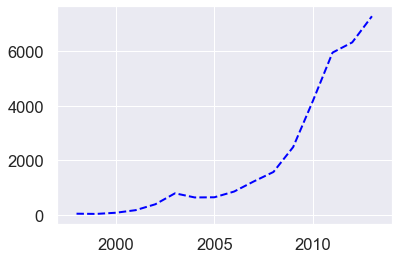

In [19]:
# 방법1) 
plt.plot(series_specific.index, series_specific.values, color='blue', linewidth=2, linestyle='--')
plt.xlim(1997, 2014)
plt.show();

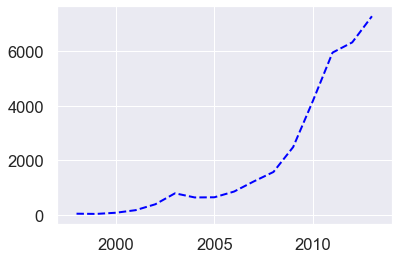

In [20]:
# 방법2)
series_specific.plot.line(color='blue', linewidth=2, linestyle='--')
plt.xlim(1997, 2014)
plt.show();

- **운영중인 커피숍 대상으로 1997-2014년도 사이의 개업 회수를 도수분포표로 요약하시오**

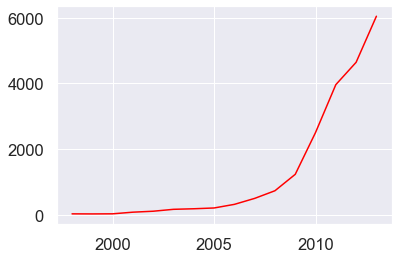

In [23]:
df_oper = data2_oper[(data2_oper['yearOfStart'] > 1997) & (data2_oper['yearOfStart'] < 2014)]
sr_oper = df_oper['yearOfStart'].value_counts()
sr_oper = sr_oper.sort_index()

plt.plot(sr_oper.index, sr_oper.values, color='red');

- **폐업상태 커피숍 대상으로 1997~2014년도 사이의 개업 회수를 도수분포표로 요약하시오.**

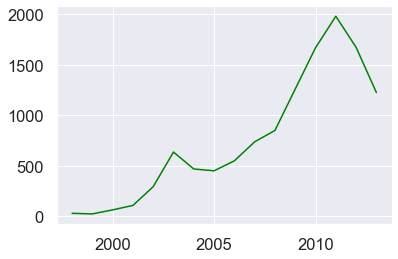

In [25]:
df_shut = data2_shut[(data2_shut['yearOfStart'] > 1997) & (data2_shut['yearOfStart'] < 2014)]
sr_shut = df_shut['yearOfStart'].value_counts()
sr_shut = sr_shut.sort_index()

plt.plot(sr_shut.index, sr_shut.values, color='green');

- **위 #3과 #4 결과를 하나의 그래프로 시각화한다. 범례도 포함한다.**

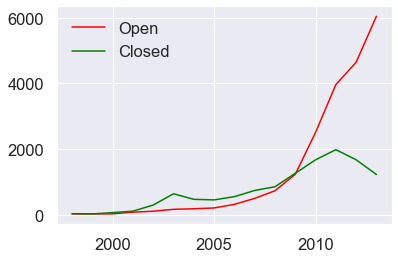

In [26]:
# 방법1) 
plt.plot(sr_oper.index, sr_oper.values, color='red', label='Open')
plt.plot(sr_shut.index, sr_shut.values, color='green', label='Closed')
plt.legend()
plt.show();

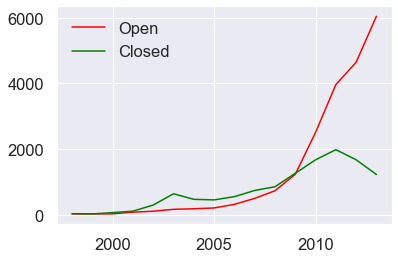

In [39]:
# 방법2) groupby 사용
groups = data2.groupby('stateOfbusiness')
my_sr = []
my_names = []

for name, dfb in groups:
    sr = dfb['yearOfStart'].value_counts()
    sr = sr.sort_index()
    sr = sr[(sr.index > 1997) & (sr.index < 2014)]
    my_sr += [sr]
    my_names += [name]
    
my_colors = ['red', 'green']
my_ls = ['-', '-']
my_labels = ['Open', 'Closed']


for i, sr in enumerate(my_sr):
    sr.plot.line(color=my_colors[i], linestyle=my_ls[i], label=my_labels[i])

plt.legend()
plt.show();